In [90]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.colors import Normalize
plt.style.use('ggplot')

Laskuharjoitus 1 Tehtävät

In [1]:
def vec_len(*arg):
    return [sqrt(sum(i ** 2)) for i in arg]

Tehtävä 1a

In [4]:
u = np.array([1,-1,2])
v = np.array([-2,2,1])
print(u@v)
'''Vektorit ei ole vastakkaisia u@v!=0'''

-2


'Vektorit ei ole vastakkaisia u@v!=0'

In [5]:
print(f'Vektorien kulma: {degrees(acos((u @ v) / (vec_len(u)[0] * vec_len(v)[0])))}')

Vektorien kulma: 105.79316904826396


1b

x: 0.7071067811865477, y: 1.2247448713915892
x: 0.8660254037844387, y: -0.49999999999999994


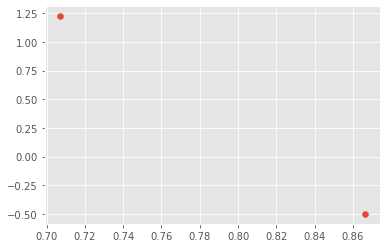

In [11]:
x1 = 2 ** (1/2) * cos(pi/3)
y1 = 2 ** (1/2) * sin(pi/3)
x2 = 1 * cos(-pi/6)
y2 = 1 * sin(-pi/6)
print(f'x: {x1}, y: {y1}')
print(f'x: {x2}, y: {y2}')
plt.scatter([x1, x2], [y1, y2])
plt.show()

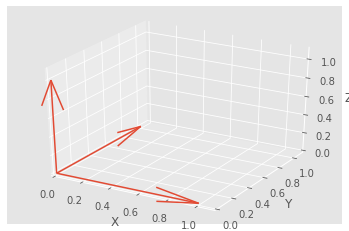

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
soa = np.array([[0, 0, 0, 0, 0, 1], [0,0,0,1,0,0], [0,0,0,0,1,0]])
X, Y, Z, U, V, W = zip(*soa)
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_zlim([0, 1.1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [39]:
a = np.array([1,0,0])
b = np.array([0,1,0])
c = np.array([0,0,1])
print(f'Vektorien kulma: {degrees(acos((a @ b) / (vec_len(a)[0] * vec_len(b)[0])))}')
print(f'Vektorien kulma: {degrees(acos((a @ c) / (vec_len(a)[0] * vec_len(c)[0])))}')

Vektorien kulma: 90.0
Vektorien kulma: 90.0


In [125]:
def three_dim_vector_space(v_set, x_lim=[0,1], y_lim=[0,1], z_lim=[0,1]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y, Z, U, V, W = zip(*v_set)
    ax.quiver(X, Y, Z, U, V, W, color=cm.jet(Normalize()(np.random.random(len(v_set)*100))))
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    return plt

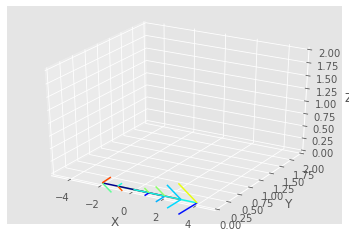

In [134]:
three_dim_vector_space(np.array([[0,0,0,1,0,0], [0,0,0,2,0,0], [0,0,0,3,0,0], [0,0,0,4,0,0],
                        [0,0,0,-1,0,0], [0,0,0,-2,0,0]]), 
                        x_lim=[-5,5], y_lim=[0,2], z_lim=[0,2]).show()

In [180]:
def make_v_set(n, x=True, y=False, z=False, start=0, step=1):
    v_set = np.empty((0,6))
    for i in np.arange(start, n*step+step, step):
        a = 0 if not x else i
        b = 0 if not y else i
        c = 0 if not y else i
        v_set = np.append(v_set, np.array([[0, 0, 0, a, b, c]]), axis=0)
    return v_set

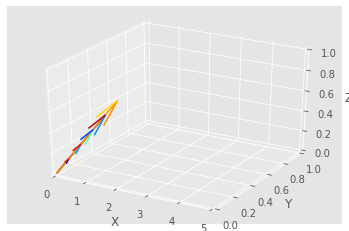

In [181]:
three_dim_vector_space(make_v_set(5, y=True, start=.1, step=.1), x_lim=[0,5]).show()